In [ ]:
# Paquetes

import numpy as np
import sympy as spp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import math

# B = pd.read_csv("/content/Boston.csv",sep=',')

In [ ]:
Data = pd.read_csv("/content/Antioquia.csv",sep=','); Data

In [ ]:
plt.figure(figsize=(15,4)); sns.histplot(Data['municipionombre'])
plt.xticks(rotation=90,size=7); plt.title('Frecuencia de municipios'); plt.show()

plt.figure(figsize=(10,3)); sns.histplot(Data['bandera']);plt.xticks(rotation=45)
plt.title('Frecuencia de empresas'); plt.show()

plt.figure(figsize=(8,5)); sns.boxplot(data=Data['precio'])
plt.title('Diagrama de caja y bigotres del precio de la gasolina'); plt.show()

In [ ]:
prec_sa, ind = [],[]; d = Data['precio']
for i in range(len(d)): 
  if 8700<=d[i]<=9200: prec_sa.append(d[i])
  else: ind.append(i)

plt.figure(figsize=(8,3.5)); sns.histplot(prec_sa)
plt.title('Histograma del precio con datos atipicos',size=15); plt.show()
(pd.DataFrame(prec_sa)).describe()

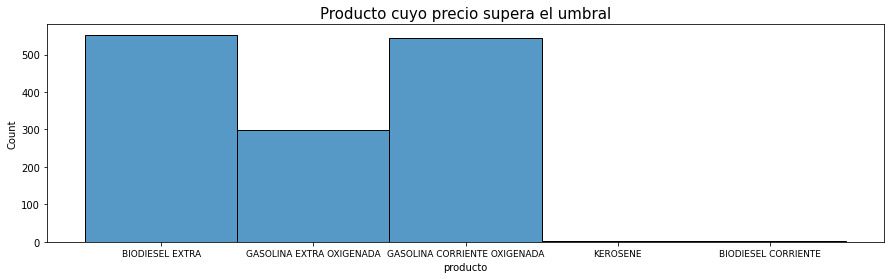

In [ ]:
plt.figure(figsize=(15,4)); sns.histplot(data=Data['producto'])
plt.title('Producto cuyo precio supera el umbral',size=15);plt.xticks(size=9);  plt.show()

In [ ]:
Data.groupby('producto')['BIODIESEL CORRIENTE']

In [ ]:
Data

,municipiocodigo,municipionombre,agente,bandera,direccion,producto,precio,fecharegistro
0,5837,TURBO,BOMBA CODI EL PUEBLO,PROXXON,CRA 13 99 A 41,BIODIESEL EXTRA,8893,05/07/2018 12:00:00 AM
1,5642,SALGAR,SERVICENTRO ZEUSS SALGAR,ZEUSS,SECTOR EL PUENTE RESTREPO VEREDA BELLAVISTA,BIODIESEL EXTRA,8767,05/04/2018 12:00:00 AM
2,5001,MEDELLIN,ESTACION DE SERVICIO TERPEL CAMPO VALDES,TERPEL,CARRERA 49 No. 84-61,GASOLINA EXTRA OXIGENADA,11980,05/03/2018 12:00:00 AM
3,5854,VALDIVIA,ESTACION DE SERVICIO EL 15,TEXACO,CARRETERA TRONCAL PUERTO VALDIVIA,BIODIESEL EXTRA,8269,05/02/2018 12:00:00 AM
4,5266,ENVIGADO,ESTACION DE SERVICIOS PREMIUM LA SEBASTIANA,TEXACO,CARRERA 27 No. 36 SUR-199,GASOLINA EXTRA OXIGENADA,11540,05/02/2018 12:00:00 AM
...,...,...,...,...,...,...,...,...
1393,5250,EL BAGRE,ESTACION DE SERVICIO A.C. LA FLORESTA,PETROMIL,CALLE 56 No. 56-21 BARRIO LA FLORESTA,BIODIESEL EXTRA,8962,05/07/2018 12:00:00 AM
1394,5670,SAN ROQUE,AUTOCENTRO LAS PALMERAS,TERPEL,CARRERA 17 N 24 A 107,GASOLINA CORRIENTE OXIGENADA,8640,05/01/2018 12:00:00 AM
1395,5895,ZARAGOZA,GASOLINERA SAN GREGORIO,TEXACO,CARRERA 43 No. 35-06,GASOLINA CORRIENTE OXIGENADA,8757,05/04/2018 12:00:00 AM
1396,5001,MEDELLIN,ESTACION DE SERVICIO DISTRACOM PEDREGAL,MOBIL,Carrera 64 C No.89 A-30,BIODIESEL EXTRA,8420,05/03/2018 12:00:00 AM


# 1. Análisis de datos 

## Diabetes


Escogemos el Dataset "Diabetes" y exploramos los datos por medio de la libreria Pandas

In [ ]:
D

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Se observa que para los años, se podrían crear diferentes categorias para estudiar qué tantas personas se encuentran entre ciertos intervalos de años. Entonces, de 0-100 años se crearán 10 categorias con pasos de 10 años, claramente. 

Para esto, se crea una lista con dichas categorias y otra con la cantidad de personas que se encontrarán en esas categorias. Entonces se recorre toda esta lista de edades y si la edad se encuentra en el intervalo; por ejemplo, de 0-10, entonces lo agregará en la primera lista. Del mismo modo para todos los demás intervalos. 

Finalmente, se corre estas listas de lista contando cuántas personas se encuentran en dichas listas que realmente son las categorias ya mencionadas. Entonces, "$len(x)$" cuenta cuántos elementos tiene la lista dada ($x$) y luego se realiza su gráfico de pastel con $matplotlib$ indicando los porcentajes de personas que se encuentran en dichos intervalos de edad.

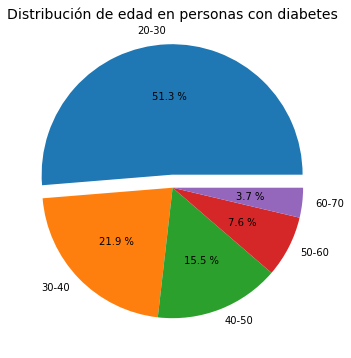

Promedio: 33.24 Desviación estandar: 11.76


In [ ]:
cat = ['20-30','30-40','40-50','50-60','60-70']
Age_c = [[],[],[],[],[]]; Age_o=[]
for i in D['Age']:
  if 20<=i<=30: Age_c[0].append(i)
  if 30<=i<=40: Age_c[1].append(i)
  if 40<=i<=50: Age_c[2].append(i)
  if 50<=i<=60: Age_c[3].append(i)
  if 60<=i<=70: Age_c[4].append(i)

for i in range(5):
  Age_o.append(len(Age_c[i]))

plt.figure(figsize=(6,6))
plt.pie(Age_o,labels=cat,autopct='%0.1f %%',explode=(0.1,0,0,0,0))
plt.title('Distribución de edad en personas con diabetes',size=14)
plt.show()

u=round(D['Age'].mean(),2); s=round(D['Age'].std(),2)
print('Promedio:',u,'Desviación estandar:',s)

Donde la edad promedio es: 33.24 años y en general, cada persona tiene una: 11.76 más años que cualquier otra; es decir, una desviación estandar de 11.76 años. También se observa que la mayor parte de la población está entre 20-30 años y la menor se encuentra entre 60-70 años.

Ahora; con respecto a la edad, sería común pensar que entre más longeva una persona, menor cantidad de insulina y glucosa tendrá. Por otro lado, veremos si la presión arterial y el diagnostico de diabetes se ve afectado con respecto a la edad de la persona. Y finalmente, observaremos cómo podemos comparar el Indice de masa corporal (BMI) de una persona y su Función del árbol genealógico de la diabetes.

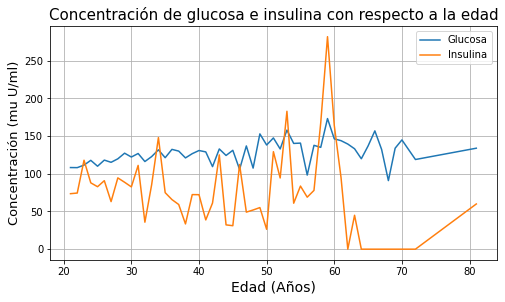

In [ ]:
x = D.groupby(by='Age').mean().index
y = D.groupby(by='Age').mean()['Glucose'].values
z = D.groupby(by='Age').mean()['Insulin'].values

plt.figure(figsize=(8,4.3))
plt.plot(x,y,label='Glucosa'); plt.plot(x,z,label='Insulina')
plt.title('Concentración de glucosa e insulina con respecto a la edad',size=15)
plt.xlabel('Edad (Años)',size=14); plt.ylabel('Concentración (mu U/ml)',size=13)
plt.legend(); plt.grid(); plt.show()

Tomando $x$ como la edad, $y$ como la concentración de glucosa y $z$ como la concentración de insulina, los agrupamos tomando el promedio para cada edad que se repite por medio de la función $Df.groupby(by='Columna').mean()$ y luego gráficamos por medio de $matplotlib$. 

Vemos que para la insulina puede haber un decrecimiento y para la glucosa un ligero crecimiento, pero los datos están muy dispersos, por lo que no es claro; pues, muchos hay muchos datos atipicos. Por lo cual, realizaremos un modelo de regresión para poder eliminar dichos datos atipicos y que nuestra dispersión esté más suavizada.

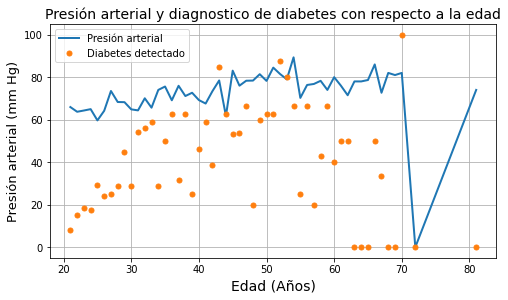

In [ ]:
w = D.groupby(by='Age').mean()['BloodPressure'].values
o = D.groupby(by='Age').mean()['Outcome'].values*100

plt.figure(figsize=(8,4.3))
plt.plot(x,w,lw=2,label='Presión arterial'); plt.plot(x,o,'o',ms=5,label='Diabetes detectado')
plt.title('Presión arterial y diagnostico de diabetes con respecto a la edad',size=14)
plt.xlabel('Edad (Años)',size=14); plt.ylabel('Presión arterial (mm Hg)',size=13)
plt.legend(loc=2); plt.grid(); plt.show()

Nuevamente, vemos que hay un dato atipico que corresponde a una persona que no le tomaron el dato de la presión arterial. Requeriremos un modelo ML para eliminar este dato. 

Por otro lado, vemos que efectivamente a mayor edad, es mucho más posible de ser diagnosticado de diabetes y que parece ser que la presión arterial (mm Hg) va aumentando.

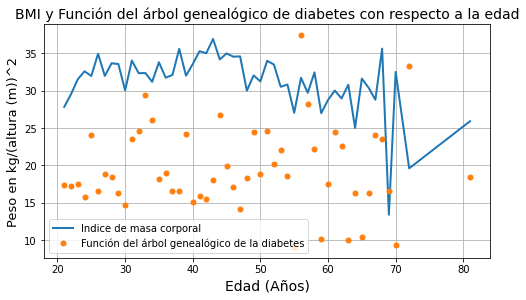

In [ ]:
b = D.groupby(by='Age').mean()['BMI'].values
o = D.groupby(by='Age').mean()['DiabetesPedigreeFunction'].values*40

plt.figure(figsize=(8,4.3))
plt.plot(x,b,lw=2,label='Indice de masa corporal'); plt.plot(x,o,'o',ms=5,label='Función del árbol genealógico de la diabetes')
plt.title('BMI y Función del árbol genealógico de diabetes con respecto a la edad',size=14)
plt.xlabel('Edad (Años)',size=14); plt.ylabel('Peso en kg/(altura (m))^2',size=13)
plt.legend(); plt.grid(); plt.show()

Nos vemos en la necesidad de multiplicar por $40$ o por $100$ en el anterior caso la Función del árbol genealógico de la diabetes y el diagnostico de diabetes; respectivamente, con el fin de comparar de forma más clara este valor sin dimensión con respecto a la Presión arterial y a la Función del árbol genealógico de la diabetes, respectivamente. 

Ahora; con respecto a la gráfica, vemos que a partir de los 50 la masa corporal de una persona disminuye considerablemente pero la edad de una persona es totalmente indiferente a la Función del árbol genealógico de la diabetes.

## Wine

Observemos el dataset por medio de Pandas

In [ ]:
W

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Vemos que para tres distintos tipos de vino, tenemos diferentes grados de alcohol. Entonces, si sacamos el promedio de estos grados de alcohol para los tres diferentes tipos; tendremos que,

In [ ]:
W.groupby(by='Wine').mean()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


Así; el grado de alcohol en promedio para,


1.   Vino 1: $13.745$
2.   Vino 2: $12.279$
3.   Vino 3: $13.154$

Y en general, $(13.745+12.279+13.154)/3=13.06$ es el grado de alcohol promedio para los tres diferentes tipos de alcohol. Ahora; realicemos un histograma para ver cuántos vinos se encuentran entre $11$ y $15$ grados de alcohol, independientemente del tipo de vino.

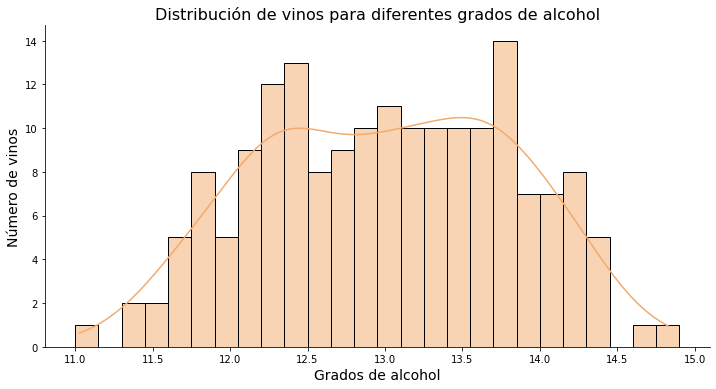

In [ ]:
sb.displot(x=W['Alcohol'].values,bins=np.arange(11,15,0.15), color='#F2AB6D', kde=True,aspect=2)
plt.title('Distribución de vinos para diferentes grados de alcohol',size=16)
plt.xlabel('Grados de alcohol',size=14); plt.ylabel('Número de vinos',size=14); plt.show()

La mayor cantidad de vinos se encuentran entre 12.25 y 13.75 donde justamente se encuentra el promedio del grado de alcohol de todos los vinos. Donde efectivamente, vemos en la gráfica que justamente $13.06$ es aproxidamente igual al promedio. Y además, esta ditribución de datos parece aproximarse a una distribución normal o chi-cuadrado.

Miremos ahora la cantidad de magnesio en todos los tipos de vino.

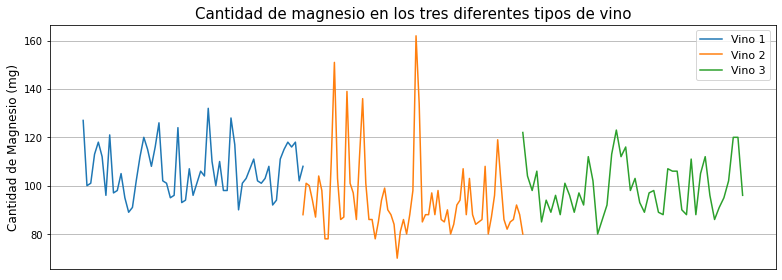

In [ ]:
w1,w2,w3 = [],[],[]
i = W['Wine'].values
for x in range(len(i)):
  if i[x]==1: w1.append(W['Mg'].values[x])
  if i[x]==2: w2.append(W['Mg'].values[x])
  if i[x]==3: w3.append(W['Mg'].values[x])

x1,x2,x3 = np.linspace(0,1,len(w1)),np.linspace(1,2,len(w2)),np.linspace(2,3,len(w3))
plt.figure(figsize=(13,4.5)); plt.xticks(ticks=[])
plt.plot(x1,w1,label='Vino 1'); plt.plot(x2,w2,label='Vino 2'); plt.plot(x3,w3,label='Vino 3')
plt.title('Cantidad de magnesio en los tres diferentes tipos de vino',size=15)
plt.ylabel('Cantidad de Magnesio (mg)',size=12); plt.legend(fontsize=11); plt.grid(); plt.show()

Sabemos gracias al promedio de cada columna para los tres diferentes tipos de vino, que la mayor cantidad de magnesio es del tipo 1 con $106.339 mg$ aproxidamente. Pero ahora, recorriendo todos los tipos de vino, dependiendo de cuál sea, agregaremos su cantidad de magnesio correspondiente a una lista inicialmente vacía. Entonces; por ejemplo, para el primer dato es de tipo 1 como su valor es igual a 1, agregamos su cantidad correspondiente de Magesio a la lista inicialmente vacía $w1$. 

Luego gráficamos estas listas y nos damos cuenta que efectivamente el que mayor tiene cantidad de magnesio es el primer tipo de vino. Pero existe un vino de tipo 2 que tiene la mayor cantidad de magnesio con aproximadamente $160mg$ y otro con $150mg$ como también otro que tiene la menor cantidad de magnesio con $70mg$. Entonces podemdos decir que los vinos del tipo 2 son los más inestables con la cantidad de magnesio que tienen. 

Finalmente, veamos la intensidad del color de cada vino mediante un gráfico.

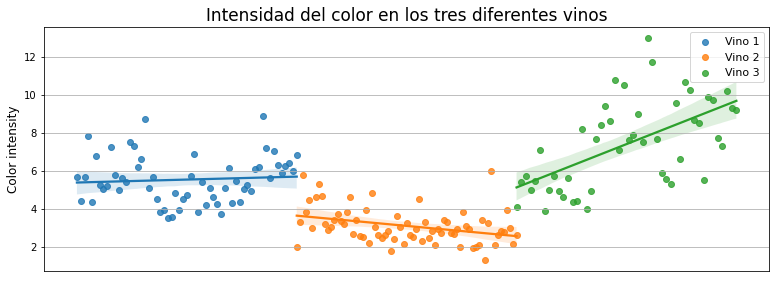

In [ ]:
c1,c2,c3 = [],[],[]
for x in range(len(i)):
  if i[x]==1: c1.append(W['Color.int'].values[x])
  if i[x]==2: c2.append(W['Color.int'].values[x])
  if i[x]==3: c3.append(W['Color.int'].values[x])

y1,y2,y3 = np.linspace(0,1,len(c1)),np.linspace(1,2,len(c2)),np.linspace(2,3,len(c3))
plt.figure(figsize=(13,4.5)); plt.xticks(ticks=[])
sb.regplot(x=y1,y=c1, label='Vino 1'); sb.regplot(x=y2,y=c2, label='Vino 2'); sb.regplot(x=y3,y=c3, label='Vino 3')
plt.title('Color intensity en los tres diferentes vinos',size=17)
plt.ylabel('Color intensity',size=12); plt.legend(fontsize=11); plt.grid(); plt.show()

Claramente, los datos no siguen una regresión lineal, pero nos ayuda a identificar que el tercer vino tiene el color más intenso; pues,

1. Color.int para el vino 1: 5.528
2. Color.int para el vino 2: 3.086
3. Color.int para el vino 3: 7.4

Lo cual equivale a una diferencia del $46.21$%. 


In [ ]:
round(7.4/(7.4+3.086+5.528)*100,3)

# 2. Modelo de regresión

Para el caso del dataset Diabetes, realizaremos una regresión polinomica de grado $n$; es decir, escogeremos un polinomio de tipo:
$$y(x)=c_0+c_1x+c_2x^2+\cdots+c_nx^n$$
Para esto, utilizaremos la libreria $sklearn$. Creando una función para los datos $x,y$ y el grado $n$. Luego, usando $PolynomialFeatures$ para crear el polinomio, luego ajusto mis variables $x$ y $y$ las cuales tienen que ser arreglos números unidimensionales de numpy. Y finalmente calculo el $y_ajust$ que será las predicciones para mi variable independiente. Así; usando esta función, gráfico mi variable $y$ ajustada con $n=9$.

In [ ]:
def Rcuad(x,y,n):
  reg_poly = PolynomialFeatures(degree=n)
  x_ajust = reg_poly.fit_transform(x.reshape(-1,1))
  rp = linear_model.LinearRegression(); rp.fit(x_ajust,y)
  y_ajust = rp.predict(x_ajust)
  return y_ajust, rp.score(x_ajust,y), rp.coef_[2], rp.coef_[1], rp.intercept_, 

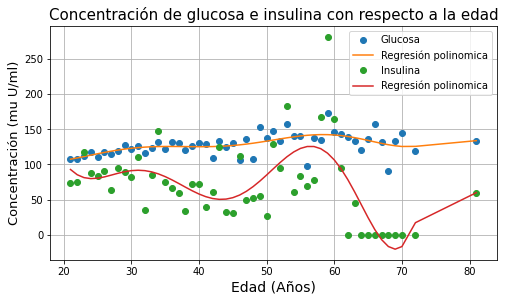

In [ ]:
x = D.groupby(by='Age').mean().index
y = D.groupby(by='Age').mean()['Glucose'].values
z = D.groupby(by='Age').mean()['Insulin'].values

plt.figure(figsize=(8,4.3)); n=9
plt.plot(x,y,'o',label='Glucosa'); plt.plot(x,Rcuad(np.array(x),np.array(y),n)[0],label='Regresión polinomica')
plt.plot(x,z,'o',label='Insulina'); plt.plot(x,Rcuad(np.array(x),np.array(z),n)[0],label='Regresión polinomica')
plt.title('Concentración de glucosa e insulina con respecto a la edad',size=15)
plt.xlabel('Edad (Años)',size=14); plt.ylabel('Concentración (mu U/ml)',size=13)
plt.legend(); plt.grid(); plt.show()

Vemos que mi la edad en años de mi población y mi concentración de Insulina y Glucosa se ajustan a un polinomio de grado 9; más exactamente, la concentración de Glucosa. 

Al haber datos tan atipicos, hace que tenga que usar un polinomio de grado superior. Pero podemos garantizar que para la concentración de Glucosa claramente es más estable que la concentración de Insulina para tanto personas lenjevas o jovenes. 

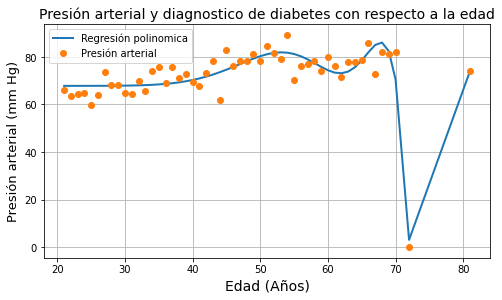

0.8422930890227045


In [ ]:
x = D.groupby(by='Age').mean().index
w = D.groupby(by='Age').mean()['BloodPressure'].values
o = D.groupby(by='Age').mean()['Outcome'].values*100

plt.figure(figsize=(8,4.3)); n=20
plt.plot(x,Rcuad(np.array(x),w,n)[0],lw=2,label='Regresión polinomica'); 
plt.plot(x,w,'o',label='Presión arterial')
plt.title('Presión arterial y diagnostico de diabetes con respecto a la edad',size=14)
plt.xlabel('Edad (Años)',size=14); plt.ylabel('Presión arterial (mm Hg)',size=13)
plt.legend(); plt.grid(); plt.show()

Al igual que con la concentración de Insulina y Glucosa; en este caso, los datos están muy dispersos entre sí. Con lo cual, hace falta un polinomio de grado $n$ para poder acercarse poco a poco a mis datos. Aunque parece haber un ligero crecimiento entre 60 y 80 mm Hg a medida que la población tiene más edad.

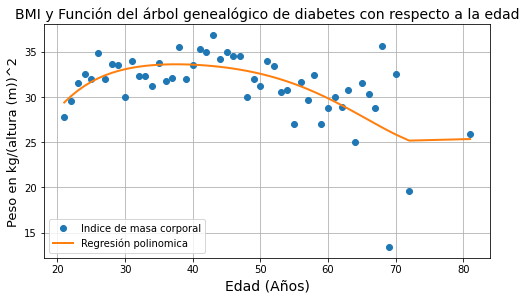

In [ ]:
b = D.groupby(by='Age').mean()['BMI'].values

plt.figure(figsize=(8,4.3)); n=5
plt.plot(x,b,'o',label='Indice de masa corporal')
plt.plot(x,Rcuad(np.array(x),b,n)[0],lw=2,label='Regresión polinomica')
plt.title('BMI y Función del árbol genealógico de diabetes con respecto a la edad',size=14)
plt.xlabel('Edad (Años)',size=14); plt.ylabel('Peso en kg/(altura (m))^2',size=13)
plt.legend(); plt.grid(); plt.show()

Para el Indice masa corporal, podemos ver que hay un ligero tope entre 35 y 50 años de edad para toda la población; es decir, entre 35 y 50 años es donde la población se encuentra con más masa corporal y peso con respecto a otras edades.

# 3. Modelo de categorización

Para el dataset Wine.cvs, realizaremos un proceso de categorización de los tres diferentes tipos de vino con sus niveles de alcohol. Entonces sabemos que el máximo y mínimo nivel de alcohol para los tres tipos de vino es de 15 y 11, respectivamente. Entonces crearemos tres categorias del siguiente modo,

1. Entre 11-12: Nivel Bajo de alcohol.
3. Entre 12-14: Nivel Intermedio de alcohol.
4. Entre 14-15: Nivel Alto de alcohol.

In [ ]:
valores = [11,12,14,15]
categorias = ['Bajo', 'Intermedio','Alto']
W['Nivel de alcohol'] = pd.cut(x=W['Alcohol'], bins=valores,labels=categorias)

Ahora que tenemos una nueva columna en mi dataset llamada "Nivel de alcohol" que corresponde a la última, procedemos a crear un nuevo dataset en el que quiero que me muestre el tipo de vino, alcohol y su nivel de alcohol.

In [ ]:
W.categorizado = W.drop(['Malic.acid','Ash','Acl','Mg','Phenols','Flavanoids','Nonflavanoid.phenols','Proanth','Color.int','Hue','OD','Proline'],axis=1)
W.categorizado

,Wine,Alcohol,Nivel de alcohol
0,1,14.23,Alto
1,1,13.20,Intermedio
2,1,13.16,Intermedio
3,1,14.37,Alto
4,1,13.24,Intermedio
...,...,...,...
173,3,13.71,Intermedio
174,3,13.40,Intermedio
175,3,13.27,Intermedio
176,3,13.17,Intermedio


Finalmente, queremos saber cuántos vinos hay para cada nivel de alcohol. Entonces lo realizaremos por medio de un ciclo for recorriendo cada dato de la columna "Nivel de alcohol" y dependiendo a qué nivel de alcohol tenga, lo agregará a una lista inicialmente vacía. 

In [ ]:
b,i,a=[],[],[]
for x in W.categorizado['Nivel de alcohol']:
  if x == 'Bajo': b.append(x)
  if x == 'Intermedio': i.append(x)
  if x == 'Alto': a.append(x)

print('Cantidad de vinos con nivel bajo: ', len(b))
print('Cantidad de vinos con nivel intermedio: ', len(i))
print('Cantidad de vinos con nivel alto: ', len(a))

Cantidad de vinos con nivel bajo:  22
Cantidad de vinos con nivel intermedio:  134
Cantidad de vinos con nivel alto:  22


Por lo tanto, vemos que hay la misma cantidad de vinos que tienen nivel bajo y alto de alcohol. Y la gran mayoría de vinos en este dataset tiene un nivel intermedio de alcohol con respecto a los demás.